In [1]:

import tensorflow as tf

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.tree import export_graphviz
tf.debugging.set_log_device_placement(True)


import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc

import re

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  2


In [3]:
import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

Using TensorFlow backend.


In [4]:

from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

10.0
7.6


In [5]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15101080522502040335, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12612430017398725319
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16826709323154978665
 physical_device_desc: "device: 1, name: GeForce RTX 2070, pci bus id: 0000:65:00.0, compute capability: 7.5"]

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline


import datetime, os

from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.model_selection import train_test_split

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

[SVM], Logistic; random forrest, naive bayes, XGBoost, [DN

In [7]:
data = pd.read_csv('final_project_mod.csv', dtype = {'Continent': 'category', 'Month':'category', 'DayOfWeek':'category'})

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 49 columns):
x0           159912 non-null float64
x1           159912 non-null float64
x3           159912 non-null float64
x4           159912 non-null float64
x5           159912 non-null float64
x6           159912 non-null float64
x7           159912 non-null float64
x8           159912 non-null float64
x9           159912 non-null float64
x10          159912 non-null float64
x11          159912 non-null float64
x12          159912 non-null float64
x13          159912 non-null float64
x14          159912 non-null float64
x15          159912 non-null float64
x16          159912 non-null float64
x17          159912 non-null float64
x18          159912 non-null float64
x19          159912 non-null float64
x20          159912 non-null float64
x21          159912 non-null float64
x22          159912 non-null float64
x23          159912 non-null float64
Continent    159912 non-null category


In [9]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

In [10]:
# The fist step in ordering a category feature is to define a custom order by way of CategoricalDtype
month_ordered_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Next, the attribute needs to be explicitly re_ordered:
cat_dtype = pd.api.types.CategoricalDtype(categories=month_ordered_categories, ordered=True)
data.Month = data.Month.astype(cat_dtype)

# Repeat steps for DayOfWeek
dayofweek_ordered_categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
cat_dtype = pd.api.types.CategoricalDtype(categories=dayofweek_ordered_categories, ordered=True)
data.DayOfWeek = data.DayOfWeek.astype(cat_dtype)

# Repate Steps for Continent
# Ordering based upon population
continent_ordered_categories = ['Asia', 'America', 'Europe']
cat_dtype = pd.api.types.CategoricalDtype(categories=continent_ordered_categories, ordered=True)
data.Continent = data.Continent.astype(cat_dtype)

In [11]:
data.Month.astype("category").cat.codes.unique()

array([ 6,  7,  5,  4,  8,  3, 10,  9,  2,  1, 11,  0], dtype=int64)

In [12]:
data['Month'].dtypes

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 ordered=True)

In [13]:
data.DayOfWeek.astype("category").cat.codes.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [14]:
data['DayOfWeek'].dtypes

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)

In [15]:
data.Continent.astype("category").cat.codes.unique()

array([2, 0, 1], dtype=int64)

In [16]:
data['Continent'].dtypes

CategoricalDtype(categories=['Asia', 'America', 'Europe'], ordered=True)

In [17]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

## separte the features from target

In [18]:
x = data.drop(['y'], axis = 1)

In [19]:
y = data['y']

In [20]:
y = y.to_numpy()

In [21]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
##set one-hot for the category features

In [23]:
x[x.select_dtypes('category').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,Continent,3
1,Month,12
2,DayOfWeek,5


In [24]:
#ok, about an extra 20 features will come out.  
#will need to put to an array, and then will need to cocatenate

In [25]:
x1 = pd.get_dummies(x,prefix = ['Continent', 'Month', 'DayOfWeek'])

In [26]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 65 columns):
x0                   159912 non-null float64
x1                   159912 non-null float64
x3                   159912 non-null float64
x4                   159912 non-null float64
x5                   159912 non-null float64
x6                   159912 non-null float64
x7                   159912 non-null float64
x8                   159912 non-null float64
x9                   159912 non-null float64
x10                  159912 non-null float64
x11                  159912 non-null float64
x12                  159912 non-null float64
x13                  159912 non-null float64
x14                  159912 non-null float64
x15                  159912 non-null float64
x16                  159912 non-null float64
x17                  159912 non-null float64
x18                  159912 non-null float64
x19                  159912 non-null float64
x20                  159912 non-nu

# scale

In [27]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
from keras.applications import Xception
from keras.utils import multi_gpu_model

In [29]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [30]:
with mirrored_strategy.scope():
    model_final = tf.keras.Sequential()
    model_final.add(layers.Dense(300, input_dim = 65, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dropout(0.1))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(1, activation = 'sigmoid'))
    
    model_final.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01, decay = 0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
    
    log_dir = 'final_logs'
    tb_random = TensorBoard(log_dir=log_dir, histogram_freq=1)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op LogicalNot in device /job:localho

In [31]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df.values, y, test_size=0.20, random_state=102)

In [32]:
print(x_train.dtype)

float64


In [33]:
history = model_final.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=1000, callbacks=[tb_random])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Executing op __inference_initialize_variables_2235 in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tens

127929/127929 [==============================] - 1s 7us/sample - loss: 0.5183 - accuracy: 0.7394 - val_loss: 1.6852 - val_accuracy: 0.3963
Epoch 38/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5149 - accuracy: 0.7423 - val_loss: 1.7409 - val_accuracy: 0.3963
Epoch 39/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5141 - accuracy: 0.7440 - val_loss: 1.9019 - val_accuracy: 0.3967
Epoch 40/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5142 - accuracy: 0.7444 - val_loss: 1.9502 - val_accuracy: 0.3964
Epoch 41/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5149 - accuracy: 0.7426 - val_loss: 1.6987 - val_accuracy: 0.3964
Epoch 42/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5164 - accuracy: 0.7410 - val_loss: 1.8432 - val_accuracy: 0.3963
Epoch 43/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5138 - accuracy

Epoch 91/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5112 - accuracy: 0.7442 - val_loss: 1.7963 - val_accuracy: 0.3963
Epoch 92/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5093 - accuracy: 0.7474 - val_loss: 2.0792 - val_accuracy: 0.3963
Epoch 93/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5074 - accuracy: 0.7479 - val_loss: 2.2050 - val_accuracy: 0.3964
Epoch 94/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5093 - accuracy: 0.7463 - val_loss: 2.1300 - val_accuracy: 0.3962
Epoch 95/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5074 - accuracy: 0.7486 - val_loss: 2.2617 - val_accuracy: 0.3963
Epoch 96/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5099 - accuracy: 0.7454 - val_loss: 1.8566 - val_accuracy: 0.3963
Epoch 97/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.50

127929/127929 [==============================] - 1s 7us/sample - loss: 0.5036 - accuracy: 0.7498 - val_loss: 2.2474 - val_accuracy: 0.3962
Epoch 145/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5045 - accuracy: 0.7499 - val_loss: 1.9152 - val_accuracy: 0.3960
Epoch 146/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5021 - accuracy: 0.7520 - val_loss: 2.0852 - val_accuracy: 0.3962
Epoch 147/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5023 - accuracy: 0.7519 - val_loss: 2.2293 - val_accuracy: 0.3963
Epoch 148/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5036 - accuracy: 0.7511 - val_loss: 1.9051 - val_accuracy: 0.3963
Epoch 149/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5035 - accuracy: 0.7505 - val_loss: 1.8766 - val_accuracy: 0.3962
Epoch 150/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5025 - ac

127929/127929 [==============================] - 1s 7us/sample - loss: 0.5028 - accuracy: 0.7509 - val_loss: 2.1596 - val_accuracy: 0.3964
Epoch 198/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5008 - accuracy: 0.7535 - val_loss: 2.2868 - val_accuracy: 0.3964
Epoch 199/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5028 - accuracy: 0.7499 - val_loss: 2.1710 - val_accuracy: 0.3963
Epoch 200/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.5003 - accuracy: 0.7536 - val_loss: 2.1598 - val_accuracy: 0.3963
Executing op CloseSummaryWriter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:0


In [34]:
predictions = model_final.predict(x_test)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

In [35]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))


Executing op ArgMax in device /job:localhost/replica:0/task:0/device:GPU:0
Prediction: [0 0 0 ... 0 0 0]
   Actuals: [1 1 0 ... 1 0 0]


In [36]:
test_accuracy = tf.keras.metrics.Accuracy()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0


In [37]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Test set accuracy: 60.348%


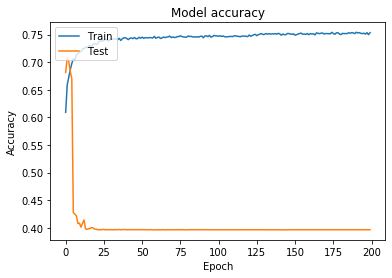

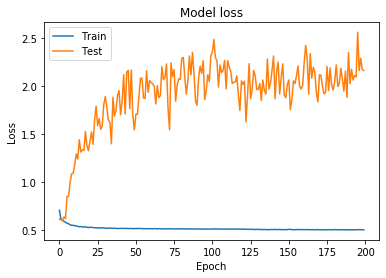

In [38]:
#come back to this; not working right.

import tkinter
import matplotlib


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.savefig("DNgraphacc.png")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.savefig("DNgraphloss.png")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
from sklearn.metrics import classification_report
predictions = (tf.argmax(predictions, 1))
classreport = classification_report(y_test,predictions)

print(classreport)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     19301
           1       0.00      0.00      0.00     12682

   micro avg       0.60      0.60      0.60     31983
   macro avg       0.30      0.50      0.38     31983
weighted avg       0.36      0.60      0.45     31983



C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [42]:
import time

import psutil


In [43]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

In [44]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# PCA

In [45]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [46]:
# use x1 and y

x2 = x1.values

y1 = y



In [47]:
x2 = StandardScaler().fit_transform(x2)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x2, y1, test_size=0.20, random_state=102)

In [49]:
pca = PCA(n_components = 5)

x_trainfit = pca.fit_transform(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

In [50]:
x_train1 = pd.DataFrame(x_train)

In [51]:
principalDF = pd.DataFrame(data = x_trainfit, columns = x_train1.columns)

In [52]:
finalDf = pd.concat([principalDF, pd.DataFrame(y_train)], axis = 1)

In [53]:
finalDf

,0,1,2,3,4,0
0,1.220800,1.324133,-1.580347,-1.019551,-1.798470,1
1,0.615768,0.474966,-1.544896,-0.828902,1.436974,0
2,-0.518228,-0.169135,-0.648963,-1.027525,1.156156,0
3,-1.111114,1.728949,-0.468866,-0.972758,0.550918,1
4,-3.024965,0.338255,0.556334,1.878958,-0.962928,0
...,...,...,...,...,...,...
127924,-1.332086,-0.014552,-2.265616,1.828351,1.045182,0
127925,-0.274151,-1.862288,0.314284,-1.125305,-0.524877,1
127926,-1.574090,0.665047,-0.823040,1.623873,2.599790,1
127927,4.092712,-1.817015,1.757956,-0.924138,0.239345,0


In [54]:
selected = pd.DataFrame(explained_variance)

In [55]:
print(selected)

          0
0  0.053987
1  0.043970
2  0.031365
3  0.027352
4  0.026655


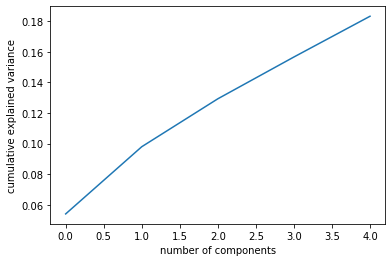

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Pass Through PCA into SVM

In [57]:
clf = SVC(kernel='linear', C=1,gamma = 0.01).fit(x_train, y_train)
clf.score(x_test, y_test)  
y_pred = clf.predict(x_test)

In [58]:
print(confusion_matrix(y_test,y_pred))

[[17460  1841]
 [ 8552  4130]]


In [59]:
print(clf.score(x_test, y_test))

0.6750461182503205


# Other Feature Selection Runs

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(scaled_train_df, y1)

In [62]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(scaled_train_df)
# Summarize selected features
print(features[0:5,:])

[8.539e-03 4.188e-02 1.048e-02 1.680e-03 3.995e-03 1.008e+01 5.741e-01
 1.673e-01 4.167e-02 5.239e-02 2.019e-03 4.626e+01 1.773e-02 5.913e-03
 1.036e-02 6.076e-02 6.497e-02 2.931e-02 1.131e-02 2.145e+02 3.448e-02
 1.172e-04 2.366e+02 1.022e-02 1.732e-02 5.326e-02 3.333e-03 7.381e-03
 1.167e-01 1.222e-02 9.781e-02 1.860e-02 6.116e-03 9.864e+00 2.359e-02
 1.464e+02 5.192e+01 4.926e+01 3.456e-04 7.259e-05 3.410e-02 5.325e+00
 1.279e-04 4.730e-02 2.067e+02 2.821e+01 3.964e+02 2.547e+01 1.726e-01
 1.400e-01 1.608e-01 6.382e-01 1.010e+00 2.256e-02 7.031e-01 1.744e-02
 9.773e-02 7.829e-01 1.552e+00 5.683e-01 5.359e-03 1.902e-01 7.804e-01
 1.227e+00 5.066e-01]
[[0.455 0.561 0.435 0.   ]
 [0.383 0.617 0.622 0.   ]
 [0.521 0.49  0.437 0.   ]
 [0.525 0.441 0.438 0.   ]
 [0.324 0.405 0.614 0.   ]]


In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(scaled_train_df, y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(scaled_train_df, y1)

In [ ]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [ ]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))